In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import shap 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns 
from imblearn.over_sampling import SMOTE

In [3]:
shap.initjs()

In [4]:
group1 = pd.read_csv('DataPaper/group1.csv')

In [5]:
group1

,ibi_s,day,user,Activity,time_seconds,time_radians,hour,hr,Cortisol_before_sleep,Cortisol_wake_up,Melatonin_before_sleep,Melatonin_wake_up,STAI1,STAI2,Pittsburgh,Efficiency,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,class
0,0.812,1,user_12,3.0,36000,2.617994,10,73.891626,0.155777,0.145431,3.542804e-09,8.639988e-09,27.0,33.0,4.0,94.23,343,21,12,low_state_anxiety
1,0.780,1,user_12,3.0,36000,2.617994,10,76.923077,0.155777,0.145431,3.542804e-09,8.639988e-09,27.0,33.0,4.0,94.23,343,21,12,low_state_anxiety
2,0.766,1,user_12,3.0,36001,2.618067,10,78.328982,0.155777,0.145431,3.542804e-09,8.639988e-09,27.0,33.0,4.0,94.23,343,21,12,low_state_anxiety
3,0.743,1,user_12,3.0,36002,2.618139,10,80.753701,0.155777,0.145431,3.542804e-09,8.639988e-09,27.0,33.0,4.0,94.23,343,21,12,low_state_anxiety
4,0.705,1,user_12,3.0,36003,2.618212,10,85.106383,0.155777,0.145431,3.542804e-09,8.639988e-09,27.0,33.0,4.0,94.23,343,21,12,low_state_anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799083,0.525,1,user_9,3.0,85798,6.239407,23,114.285714,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0,91.75,578,49,4,high_state_anxiety
799084,0.541,1,user_9,3.0,85799,6.239479,23,110.905730,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0,91.75,578,49,4,high_state_anxiety
799085,0.567,1,user_9,3.0,85799,6.239479,23,105.820106,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0,91.75,578,49,4,high_state_anxiety
799086,0.586,1,user_9,3.0,85800,6.239552,23,102.389078,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0,91.75,578,49,4,high_state_anxiety


In [6]:
group1 = group1.sample(frac=1).reset_index(drop=True)

In [7]:
group1 = group1.drop(['time_seconds','time_radians','STAI1','STAI2','day','hour','ibi_s'],axis=1).dropna()

In [8]:
group1 = group1.sample(frac=1).reset_index(drop=True)

In [37]:
group1

,user,Activity,hr,Cortisol_before_sleep,Cortisol_wake_up,Melatonin_before_sleep,Melatonin_wake_up,Pittsburgh,Efficiency,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,class
0,user_9,3.0,147.783251,0.025968,0.080560,5.593342e-09,7.385992e-09,9.0,91.75,578,49,4,high_state_anxiety
1,user_19,7.0,78.740157,0.012017,0.062891,1.629907e-09,1.495653e-09,4.0,74.07,340,118,44,low_state_anxiety
2,user_20,7.0,78.947368,0.013820,0.047007,4.885483e-09,4.638534e-09,5.0,88.07,384,52,12,high_state_anxiety
3,user_19,2.0,99.667774,0.012017,0.062891,1.629907e-09,1.495653e-09,4.0,74.07,340,118,44,low_state_anxiety
4,user_3,8.0,78.226858,0.012142,0.043799,5.714439e-09,3.603324e-09,8.0,79.23,351,89,16,low_state_anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...
752713,user_11,3.0,83.333333,0.040592,0.015572,2.038077e-09,9.653476e-09,7.0,92.02,196,17,9,high_state_anxiety
752714,user_3,3.0,101.351351,0.012142,0.043799,5.714439e-09,3.603324e-09,8.0,79.23,351,89,16,low_state_anxiety
752715,user_13,3.0,87.976540,0.012278,0.034191,1.902268e-09,2.295933e-09,4.0,76.47,247,76,19,low_state_anxiety
752716,user_22,3.0,67.567568,0.018414,0.033249,2.728199e-09,8.283802e-10,5.0,84.92,304,51,21,high_state_anxiety


In [278]:
high_state_anxiety = group1[group1['class'] == 'high_state_anxiety']
low_state_anxiety = group1[group1['class'] == 'low_state_anxiety']

high_state_anxiety_users = high_state_anxiety['user'].unique()
low_state_anxiety_users = low_state_anxiety['user'].unique()

In [279]:
min_users = min(len(high_state_anxiety_users), len(low_state_anxiety_users))
min_users

6

In [280]:
high_state_anxiety_users_selected = pd.Series(
    high_state_anxiety_users).sample(n=min_users, random_state=42).values
low_state_anxiety_users_selected = pd.Series(
    low_state_anxiety_users).sample(n=min_users, random_state=42).values

In [281]:
high_state_anxiety_selected = high_state_anxiety[high_state_anxiety['user'].isin(
    high_state_anxiety_users_selected)]
low_state_anxiety_selected = low_state_anxiety[low_state_anxiety['user'].isin(
    low_state_anxiety_users_selected)]

In [282]:
balanced_data = pd.concat(
    [high_state_anxiety_selected, low_state_anxiety_selected])
balanced_data = balanced_data.sample(
    frac=1, random_state=42).reset_index(drop=True)

In [283]:
X = balanced_data.drop(columns=['class','user'])
y = balanced_data['class']

In [284]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [285]:
for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

train_data = X_train.copy()
train_data['class'] = y_train
test_data = X_test.copy()
test_data['class'] = y_test

In [286]:
print(train_data.shape, test_data.shape)

(388150, 12) (97038, 12)


In [287]:
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")

Training set class distribution:
class
high_state_anxiety    200558
low_state_anxiety     187592
Name: count, dtype: int64
Test set class distribution:
class
high_state_anxiety    50140
low_state_anxiety     46898
Name: count, dtype: int64


In [288]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [457]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [459]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

print("Feature Importances:")
for feature, importance in zip(X_train.columns, sorted(model.feature_importances_, reverse=True)):
    print(f"{feature}: {importance:.4f}")

Accuracy on test set: 1.0000
Feature Importances:
Activity: 0.2793
hr: 0.1673
Cortisol_before_sleep: 0.1527
Cortisol_wake_up: 0.1292
Melatonin_before_sleep: 0.1145
Melatonin_wake_up: 0.0960
Pittsburgh: 0.0558
Efficiency: 0.0037
Total Sleep Time (TST): 0.0015
Wake After Sleep Onset (WASO): 0.0000
Number of Awakenings: 0.0000


In [460]:
model.feature_importances_

array([0.00154141, 0.00366283, 0.2792932 , 0.12917339, 0.        ,
       0.        , 0.05579064, 0.16728282, 0.11451692, 0.1527158 ,
       0.09602298])

In [461]:
print(pd.Series(y_pred).value_counts())

high_state_anxiety    50140
low_state_anxiety     46898
Name: count, dtype: int64


In [462]:
y_train.value_counts()

class
high_state_anxiety    200558
low_state_anxiety     187592
Name: count, dtype: int64

In [463]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

high_state_anxiety       1.00      1.00      1.00     50140
 low_state_anxiety       1.00      1.00      1.00     46898

          accuracy                           1.00     97038
         macro avg       1.00      1.00      1.00     97038
      weighted avg       1.00      1.00      1.00     97038



In [464]:
y_pred

array(['high_state_anxiety', 'low_state_anxiety', 'low_state_anxiety',
       ..., 'low_state_anxiety', 'low_state_anxiety', 'low_state_anxiety'],
      dtype=object)

In [465]:
y_test.value_counts()

class
high_state_anxiety    50140
low_state_anxiety     46898
Name: count, dtype: int64

In [466]:
confusion_matrix(y_test, y_pred)

array([[50140,     0],
       [    0, 46898]], dtype=int64)

In [467]:
train_data['class'].value_counts()

class
high_state_anxiety    200558
low_state_anxiety     187592
Name: count, dtype: int64

In [468]:
test_data['class'].value_counts()

class
high_state_anxiety    50140
low_state_anxiety     46898
Name: count, dtype: int64

In [298]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Average Cross-Validation Accuracy: 1.0000


In [469]:
cv_scores

array([1., 1., 1., 1., 1.])

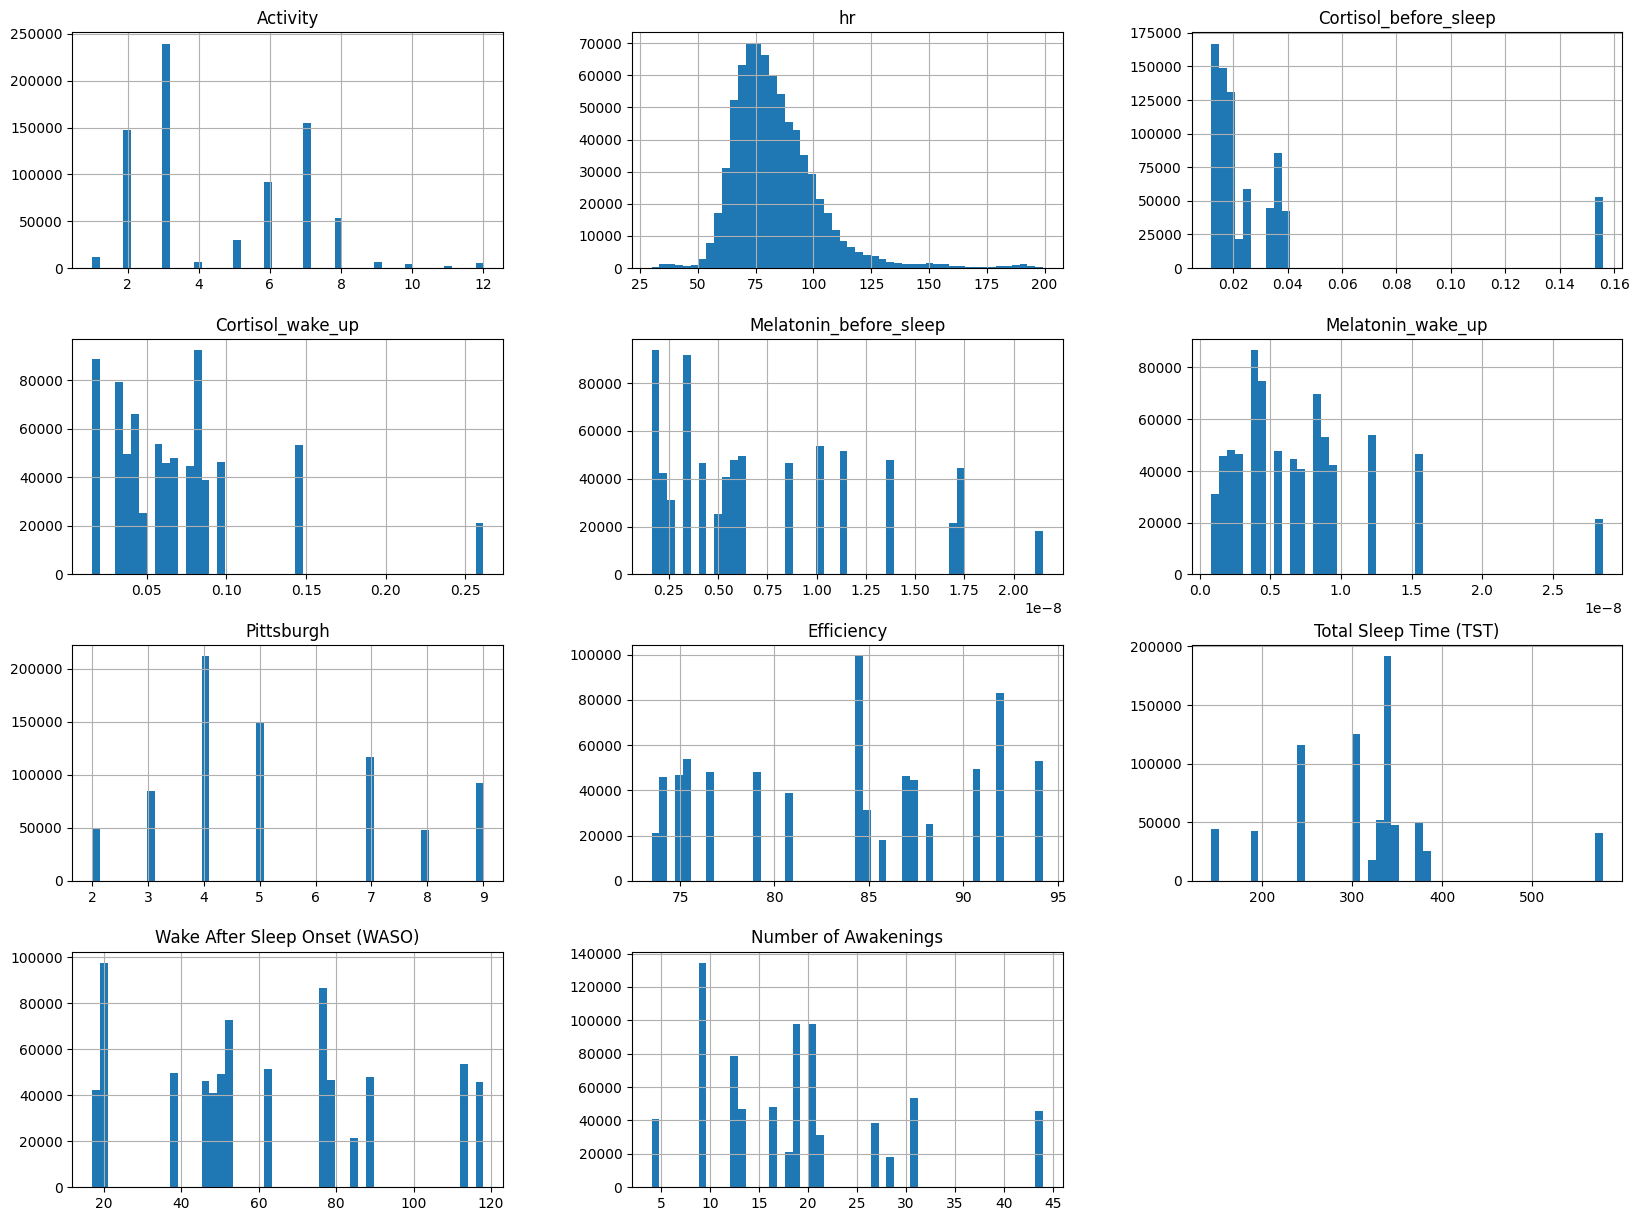

In [470]:
import matplotlib.pyplot as plt
group1.hist(bins=50, figsize=(20, 15))
plt.show()

In [519]:
explainer = shap.TreeExplainer(model)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(2, 388150, 11)


In [521]:
shap_values_ = shap_values.transpose((1, 0, 2))

np.allclose(
    model.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

True

In [513]:
model.classes_

array(['high_state_anxiety', 'low_state_anxiety'], dtype=object)

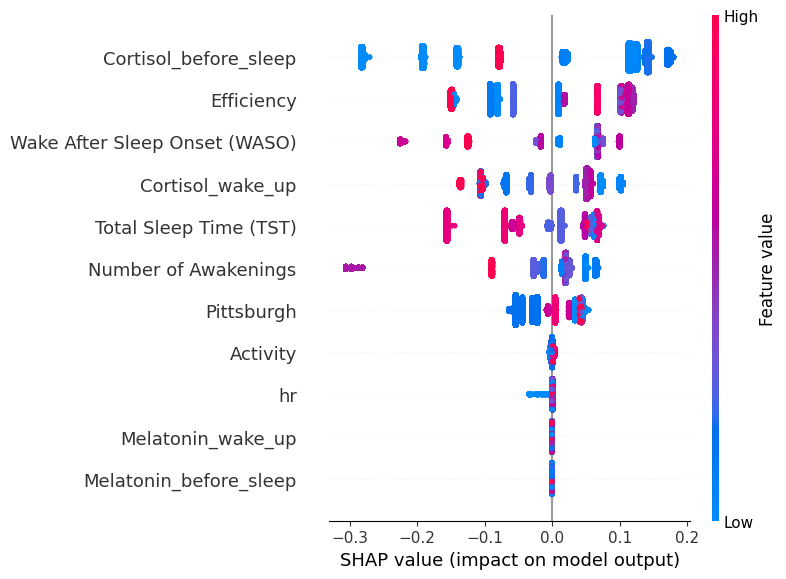

In [528]:
shap.summary_plot(shap_values[0], X_train,max_display=20,color=shap.plots.colors.red_rgb)

In [452]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [451]:
print([sv.shape for sv in shap_values])

[(97038, 11), (97038, 11)]


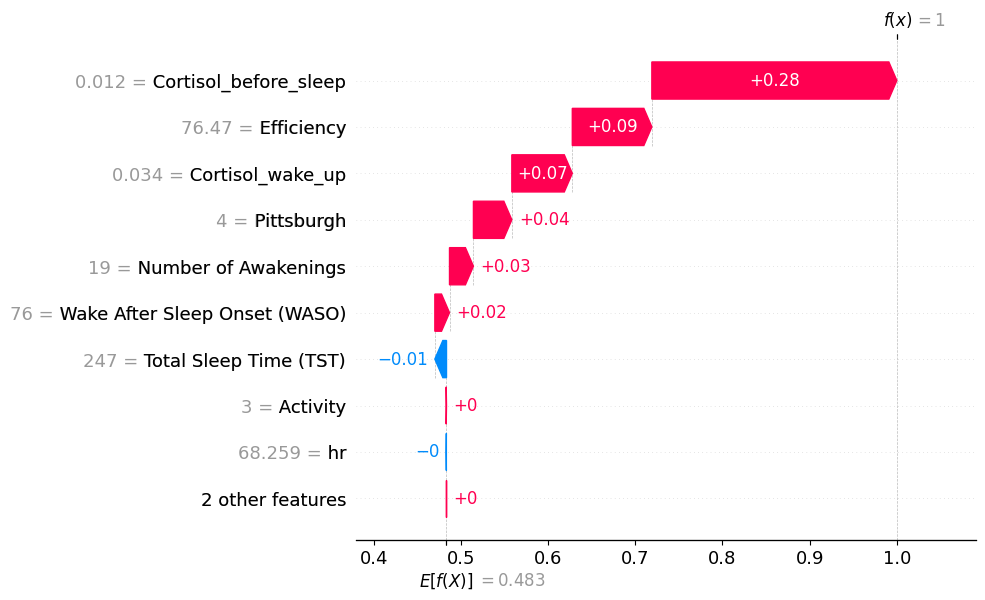

In [497]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
instance_index = 1
shap.waterfall_plot(shap.Explanation(values=shap_values[1][instance_index],
                                     base_values=explainer.expected_value[1],
                                     data=X_test.iloc[instance_index]))

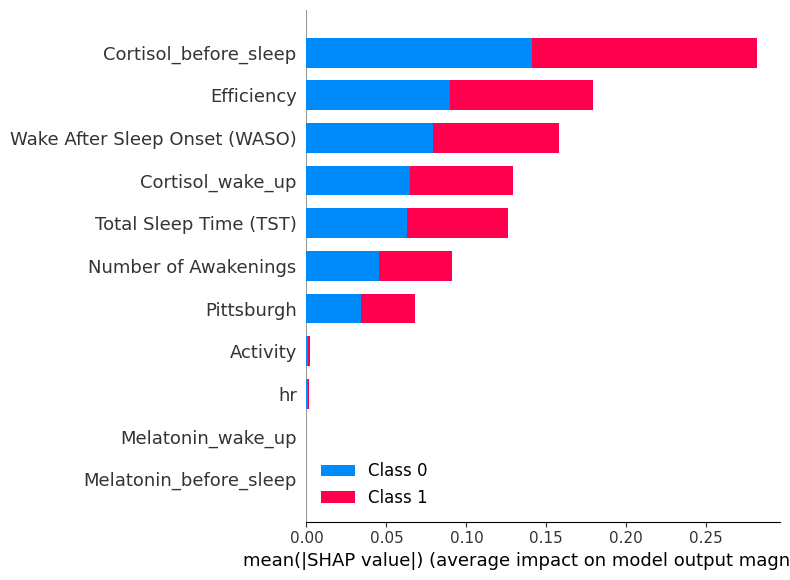

In [498]:
shap.summary_plot(shap_values, X_test)

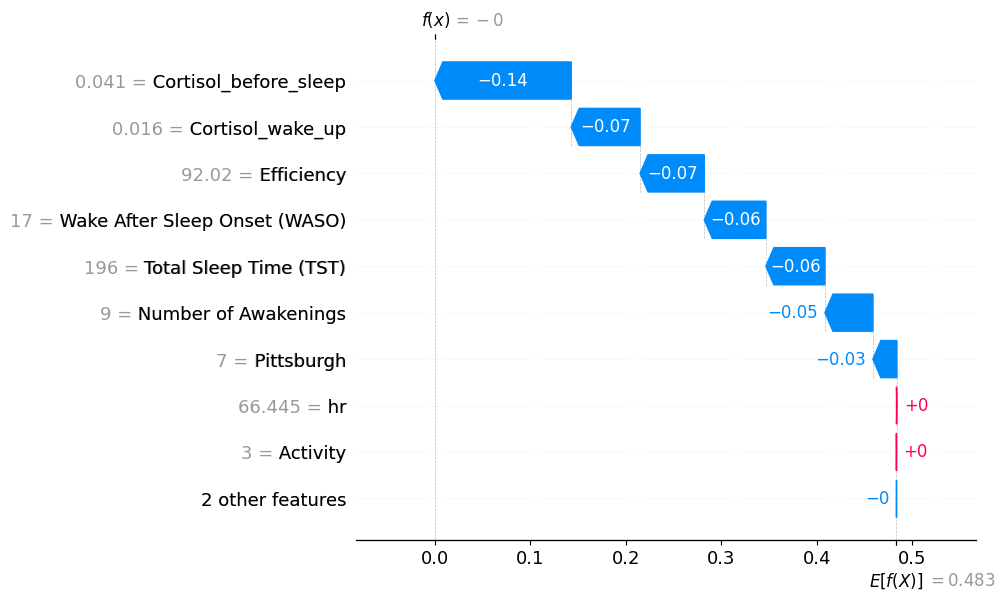

In [503]:
high_class_instance = test_data[test_data['class']
                                == 'high_state_anxiety'].iloc[0]
low_class_instance = test_data[test_data['class']
                               == 'low_state_anxiety'].iloc[0]

high_class_instance_features = high_class_instance.drop('class')
low_class_instance_features = low_class_instance.drop('class')

shap_values_high_instance = explainer.shap_values(high_class_instance_features)
shap_values_low_instance = explainer.shap_values(low_class_instance_features)

shap.waterfall_plot(shap.Explanation(values=shap_values_high_instance[1],
                                     base_values=explainer.expected_value[1],
                                     data=high_class_instance_features),
                    show=True)



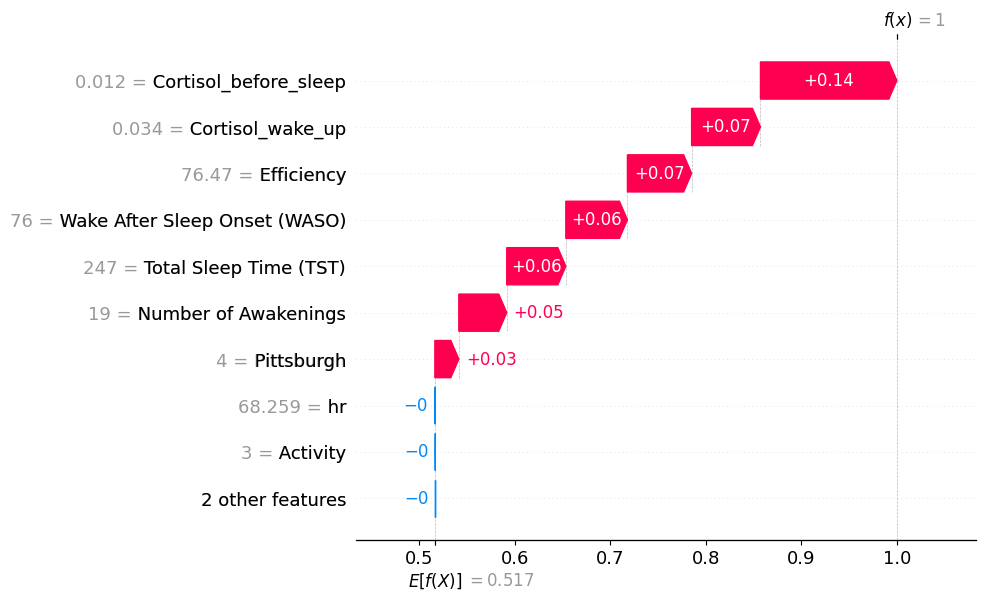

In [510]:
shap.waterfall_plot(shap.Explanation(values=shap_values_high_instance[0],
                                     base_values=explainer.expected_value[0],
                                     data=low_class_instance_features),
                    show=True)